In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import math as math
import seaborn as sns
import numpy as np 

In [61]:
df=pd.read_csv('nykaa1.csv')
print(df.shape)
# x=float("nan")
#df.drop( df[ df['Amount (In USD)'] =="undisclosed" ].index , inplace=True)
# df.drop( df[ df['Amount in USD'] =="Undisclosed" ].index , inplace=True)
# df.drop( df[ df['Amount in USD'] =="unknown" ].index , inplace=True)
# df.drop( df[ df['Amount in USD'] ==x ].index , inplace=True)
# df = df[pd.notnull(df['Amount in USD'])]

#df.to_csv('startup.csv')
df = df.rename(columns={'Amount (In USD)': 'AmountinUSD'})
df1=df['AmountinUSD'].values
amt=[]
amount2=''
n=0
b=0

for i in df1:
    for j in i:
        if j=="," or j=="+":
               
            continue
        else:
               
            amount2=amount2+j
        

    i=float(amount2)
    amt.append(i)
    amount2=''
    n=n+1
    
    b=0
df2 = pd.DataFrame(amt)
print(df2)

df.AmountinUSD=df2

df.to_csv('nykaa.csv')


(8, 10)
             0
0    8800000.0
1   13000000.0
2  157200000.0
3  157200000.0
4   24000000.0
5   11000000.0
6   12300000.0
7    9500000.0


In [82]:
df=pd.read_csv('nykaa.csv')
date=(np.asanyarray(df['Date (dd/mm/yyyy)']))
amount=(np.asanyarray(df['AmountinUSD'])).reshape(1,7)
print(amount)


[[  8800000  13000000 157200000  24000000  11000000  12300000   9500000]]


In [83]:
from datetime import datetime
date1=[]
n=0
date2=''
date3=[]
for i in date:
    for j in i:
        if j=='/':
            date2=date2+'-'
        else:
            date2=date2+j
    date3.append(date2)
    date2=''
for i in date3:
    i=datetime.strptime(i, '%d-%m-%Y').date()
    date1.append(i)
    n=n+1

date1=(np.asanyarray(date1)).reshape(1,7)
print(date1)

[[datetime.date(2020, 5, 11) datetime.date(2020, 3, 31)
  datetime.date(2018, 9, 5) datetime.date(2018, 5, 14)
  datetime.date(2018, 4, 22) datetime.date(2016, 9, 12)
  datetime.date(2015, 10, 5)]]


                  AmountinUSD                                             \
Date (dd/mm/yyyy)   11/5/2020 12/9/2016 14/05/2018 22/04/2018 31-03-2020   
Startup Name                                                               
Nykaa                 8800000  12300000   24000000   11000000   13000000   

                                        
Date (dd/mm/yyyy) 5/10/2015   5/9/2018  
Startup Name                            
Nykaa               9500000  157200000  


(1, 7)

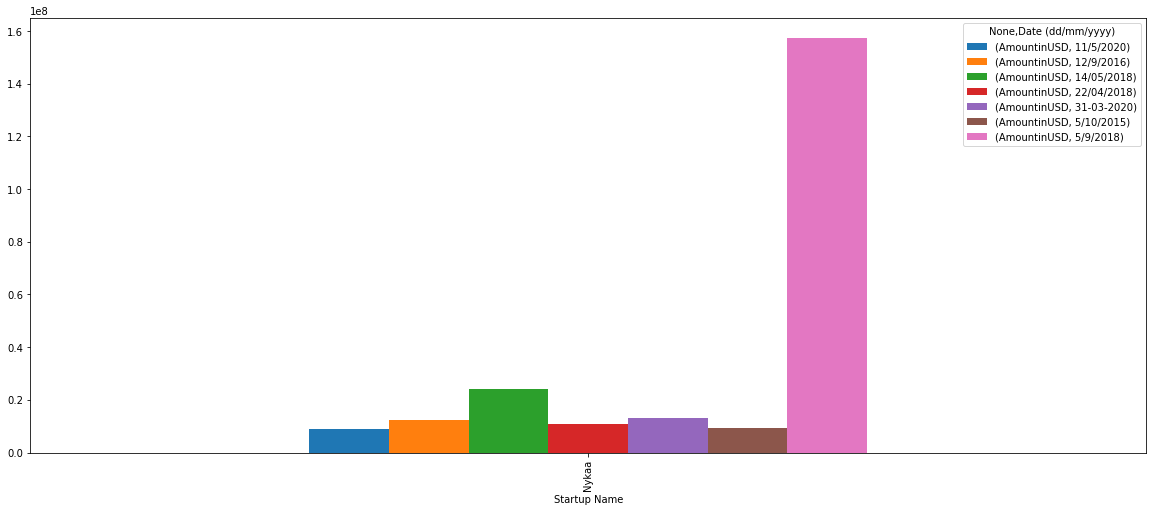

In [84]:
d=pd.pivot_table(df,index=['Startup Name'],columns=["Date (dd/mm/yyyy)"],values=['AmountinUSD'])
d=d.fillna(0)
print(d)
d.plot(kind='bar',figsize=(20,8))
d.shape

(1, 7)
(1, 7)
AxesSubplot(0.125,0.125;0.62x0.755)


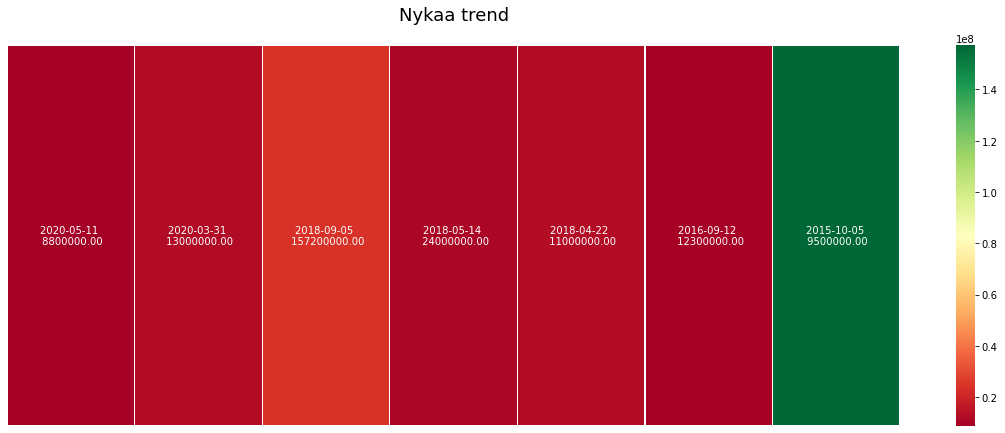

In [85]:
ig,ax=plt.subplots(figsize=(20,7))
title="Nykaa trend"
plt.title(title,fontsize=18)
ttl=ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

labels=(np.asarray(["{0} \n {1:.2f}".format(date1,amount1) for date1,amount1 in zip(date1.flatten(),amount.flatten())])).reshape(1,7)
print(labels.shape)
print(d.shape)
print(sns.heatmap(d,annot=labels,fmt="",cmap='RdYlGn',linewidth=0.30,ax=ax))
plt.show()

In [77]:
import pandas as pd
file_name = "nykaa.csv"
file_name_output = "nykaa.csv"

df = pd.read_csv(file_name)

# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset="Date (dd/mm/yyyy)", inplace=True)

# Write the results to a different file
df.to_csv(file_name_output)

In [81]:
df.head()


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,AmountinUSD,Unnamed: 9
0,0,0,0,0,8,11/5/2020,Nykaa,E-commerce,Cosmetic and Beauty Products,Mumbai,Steadview Capital,Series F,8800000.0,NaN
1,1,1,1,1,7,31-03-2020,Nykaa,E-commerce,Cosmetic and Beauty Products,Mumbai,Steadview Capital,Series F,13000000.0,NaN
2,2,2,2,2,6,5/9/2018,Nykaa,Consumer Internet,Online Marketplace For Multi-brand Beauty Cosm...,Mumbai,Lighthouse,Private Equity,157200000.0,NaN
3,4,4,4,4,264,14/05/2018,Nykaa,Consumer Internet,Beauty e-tailer,Mumbai,"Sunil Munjal, Harsh Mariwala, Dalip Pathak and...",Private Equity,24000000.0,NaN
4,5,5,5,5,306,22/04/2018,Nykaa,Consumer Internet,Beauty e-tailer,Mumbai,"Sunil Munjal, Harsh Mariwala, Dalip Pathak and...",Private Equity,11000000.0,NaN
